In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### The Keynesian Income-Expenditure model and the Investment-Saving curve

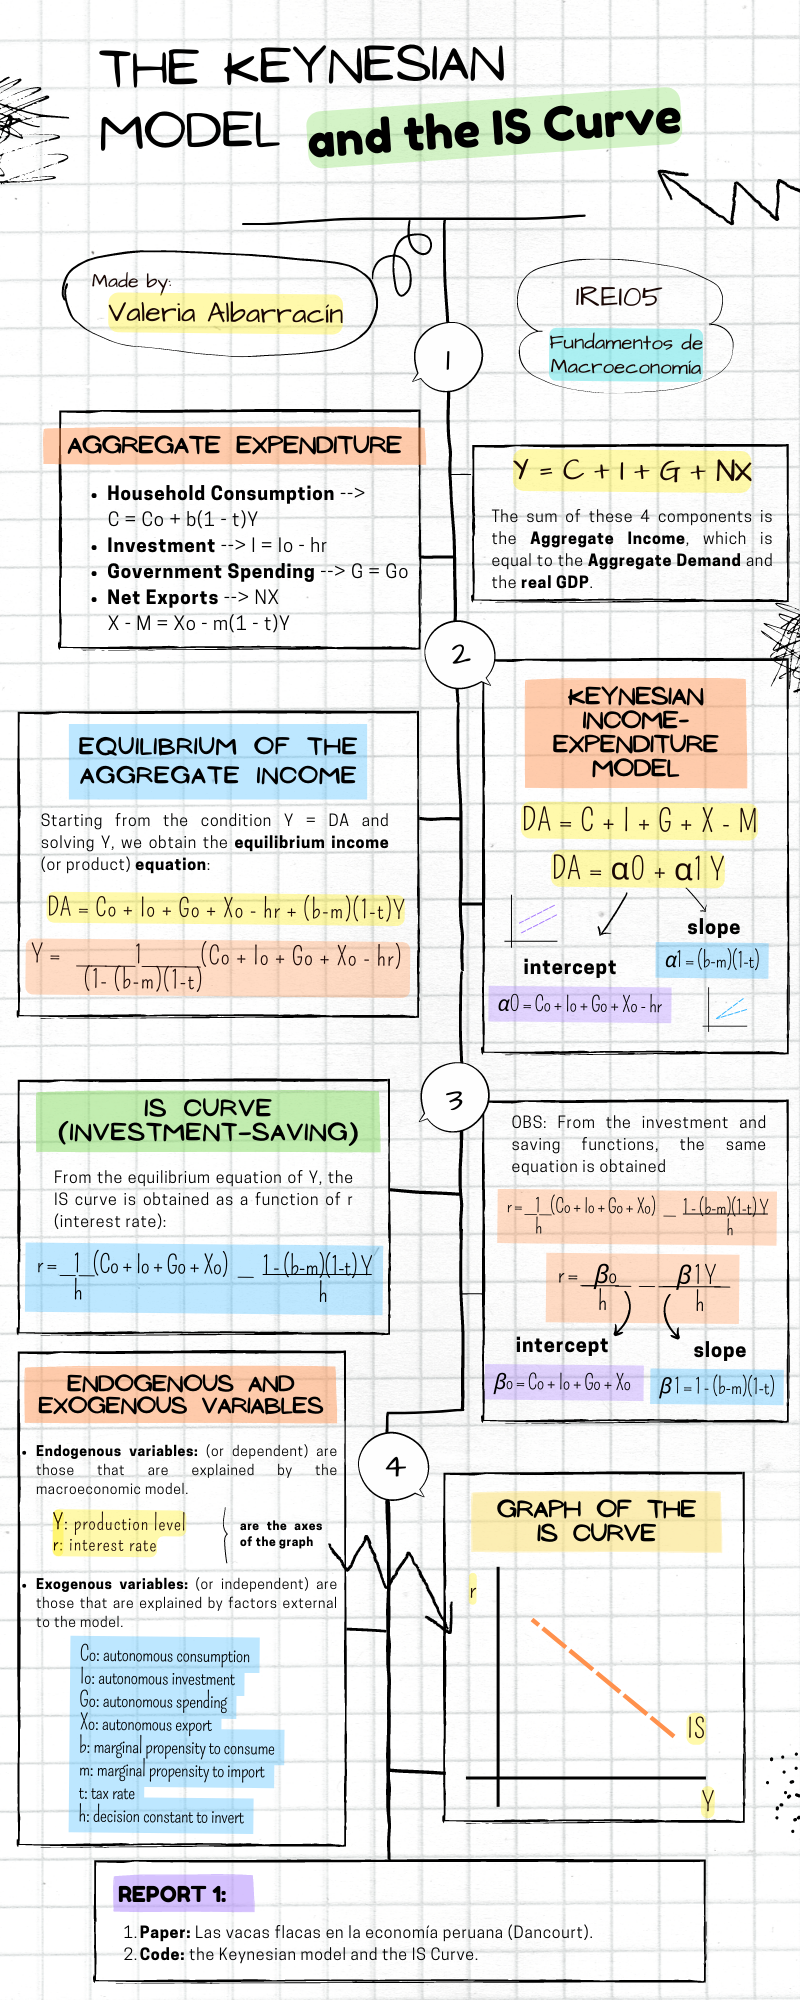

#### 1. The Keynesian Income-Expenditure model:

The equilibrium equation for the Aggregate Income is derived form the equilibrium condition where income equals aggregate demand: $DA = Y$:

$$ DA = C + I + G + X - M $$

Where:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Therefore: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

In short form:

$$ DA = α_0 + α_1Y $$

Where $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ is the intercept and $ α_1 = (b - m)(1 - t) $ is the function slope.

Then, considering the equilibrium condition $Y = DA$, the short-term equilibrium income or product equation is:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

And it is graphed as follows:

In [14]:
# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Equation of the equilibrium income curve

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [15]:
# 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

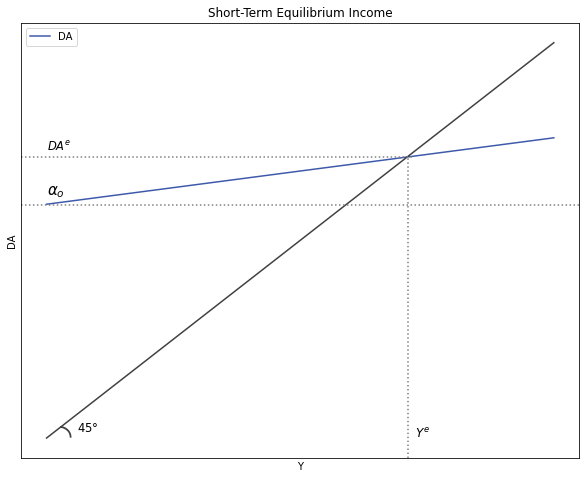

In [16]:
# Graph


# Dimensions
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Remove the quantities from the axes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Lines and text added
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=146, xmin= 0, xmax= 1, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')

# Title and legend
ax.set(title="Short-Term Equilibrium Income", xlabel= r'Y', ylabel= r'DA')
ax.legend()

plt.show()


#### 2.1. Comparative statics of the Keynesian Income-Expenditure model:

#### - Contractionary Fiscal Policy: reduction of Government Expenditure $(G_0)$:

In [17]:
#--------------------------------------------------
# ORIGINAL equilibrium income curve

    # Parameters
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Equation 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NEW equilibrium income curve

    # Define ONLY the changed parameter
Go = 35

    # Equation with the changed parameter
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

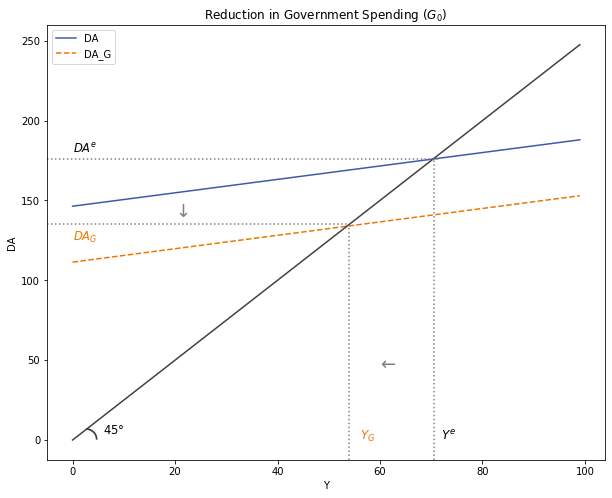

In [18]:
# Graph
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curves to plot
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") # ORIGINAL curve
ax.plot(Y, DA_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NEW curve
ax.plot(Y, L_45, color = "#404040") #45º line

# Lines and text added
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")
plt.axhline(y = 135, xmin= 0, xmax = 0.54, linestyle = ":", color = "grey")

plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(60, 45, '$←$', fontsize = 18, color = 'grey')
plt.text(20, 140, '$↓$', fontsize = 18, color = 'grey')

# Title and legend
ax.set(title = "Reduction in Government Spending $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()


- Intuition: 

$$ ↓Go → ↓DA → DA > Y → ↓Y $$

In [ ]:
# Causality graph

sprinkler = CausalGraphicalModel(nodes=["Go ↓","DA ↓","Y ↓"],
                                 edges=[("Go ↓","DA ↓"), ("DA ↓","Y ↓"),("Go ↓","Y ↓")])
sprinkler.draw()


- Mathematically: $∆G_0 < 0  →  ¿∆Y?$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

$$ ∆Y = \frac{1}{1 - (b - m)(1 - t)} (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Since there have been no changes in $C_0$, $I_0$, $X_0$, $h$ ni $r$, then: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r > 0$$

$$ ∆Y = \frac{1}{1 - (b - m)(1 - t)} (∆G_0) $$

$$ \frac{∆Y}{∆G_0}= \frac{1}{1 - (b - m)(1 - t)} $$

Knowing that $∆G_0 < 0$, division by any negative number will give another negative:

$$ \frac{∆Y}{(-)}= \frac{1}{1 - (b - m)(1 - t)} < 0 $$

$$ ∆Y < 0 $$

#### - Expansionary Fiscal Policy: reduction of the Tax rate $(t)$:

In [19]:
#--------------------------------------------------
# ORIGINAL equilibrium income curve

    # Parameters
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tax rate
r = 0.9

Y = np.arange(Y_size)

    # Equation 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NEW equilibrium income curve

    # Define ONLY the changed parameter
t = 0.01

    # Equation with the changed parameter
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

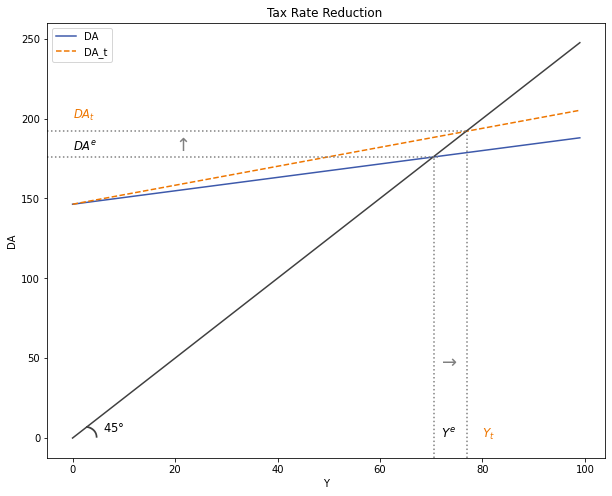

In [21]:
# Graph
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curves to plot
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #ORIGINAL curve
ax.plot(Y, DA_t, label = "DA_t", color = "#EE7600", linestyle = 'dashed') #NEW curve
ax.plot(Y, L_45, color = "#404040") #45º line

# Lines and text added
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Title and legend
ax.set(title = "Tax Rate Reduction ", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

---------------------------------

#### 3. La curva IS (Inversión-Ahorro):

The equilibrium between saving and investment is derived form the equilibrium condition where income $(Y)$ equals aggregate demand $(DA)$: $Y = DA$



Recall the short-run equilibrium income equation that was obtained from this same equilibrium:

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

This equation, after some operations, can be expressed as a function of the interest rate $(r)$:

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1 - (b - m)(1 - t)}{h}Y $$

Then, the IS curve can be simplified as follows:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Where $ B_0 = C_0 + G_0 + I_0 + X_0  $ and $  B_1 = 1 - (b - m)(1 - t) $

In [22]:
# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

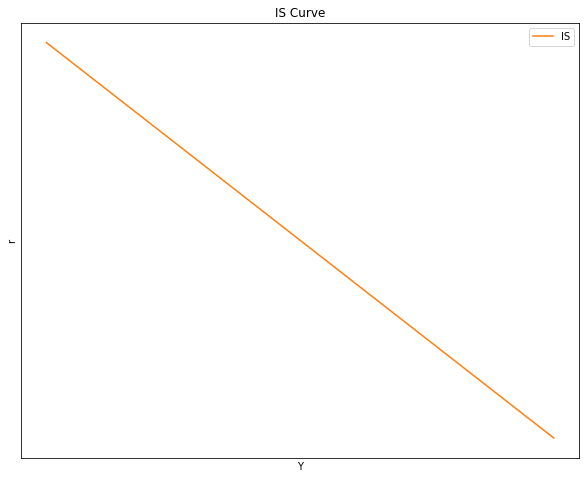

In [25]:
# Graph of the IS curve


# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "C1") #Demanda agregada

# Remove the quantities from the axes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Title, axes adn legend
ax.set(title = "IS Curve", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


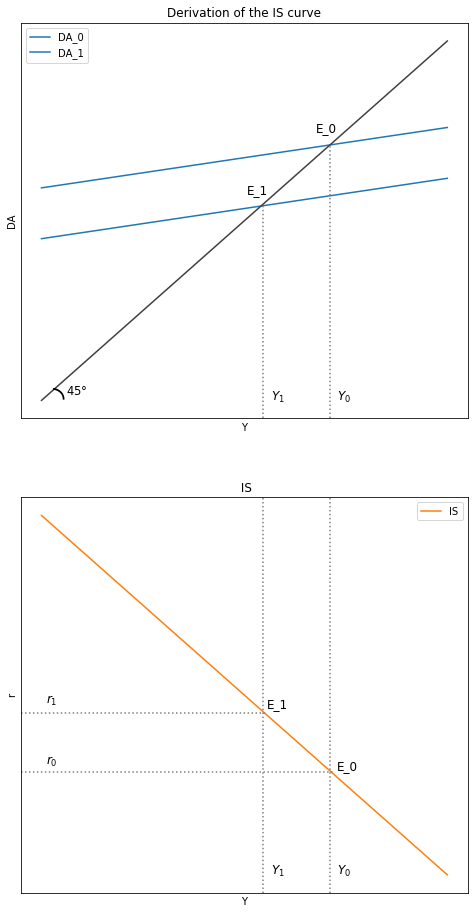

In [24]:
# Plot of the derivation of the IS curve from equality (DA = Y)

    # Two graphs in one frame
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Graph 1: Short-Term Equilibrium Income
    
ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.plot(Y, DA_IS_K, label = "DA_0", color = "C0") 
ax1.plot(Y, DA_G, label = "DA_1", color = "C0") 
ax1.plot(Y, L_45, color = "#404040") 

ax1.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
ax1.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")

ax1.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
ax1.text(2.5, -3, '$◝$', fontsize = 30, color = 'black')
ax1.text(72, 0, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(56, 0, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(67, 185, 'E_0', fontsize = 12, color = 'black')
ax1.text(50, 142, 'E_1', fontsize = 12, color = 'black')

ax1.set(title = "Derivation of the IS curve", xlabel = r'Y', ylabel = r'DA')
ax1.legend()

#---------------------------------
    # Graph 2: IS Curve

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.plot(Y, r, label = "IS", color = "C1") 

ax2.axvline(x = 70.5, ymin= 0, ymax = 1, linestyle = ":", color = "grey")
ax2.axvline(x = 54,  ymin= 0, ymax = 1, linestyle = ":", color = "grey")
plt.axhline(y = 151.5, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axhline(y = 165, xmin= 0, xmax = 0.55, linestyle = ":", color = "grey")

ax2.text(72, 128, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(56, 128, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(1, 153, '$r_0$', fontsize = 12, color = 'black')
ax2.text(1, 167, '$r_1$', fontsize = 12, color = 'black')
ax2.text(72, 152, 'E_0', fontsize = 12, color = 'black')
ax2.text(55, 166, 'E_1', fontsize = 12, color = 'black')

ax2.set(title = " IS", xlabel= 'Y', ylabel= 'r')
ax2.legend()

plt.show()


#### 3.1 Comparative statics on the IS curve

#### - Decrease in Government Spending $(G_0)$:

In [31]:
#--------------------------------------------------
    # ORIGINAL IS Curve

# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # New IS Curve

# Define ONLY the changed parameter
Go = 60

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


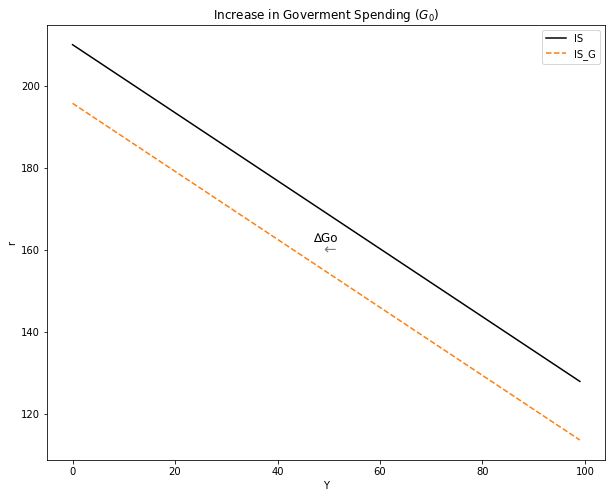

In [33]:
    # Graph

# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_G", color = "C1", linestyle = 'dashed') #New IS

# Text added
plt.text(47, 162, '∆Go', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Title and legend
ax.set(title = "Increase in Goverment Spending $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

#### - Increase in Interest Rate $(t)$:

In [28]:
#--------------------------------------------------
    # ORIGINAL IS Curve

# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # NEW IS Curve
    
# Define ONLY the changed parameter
t = 0.7

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


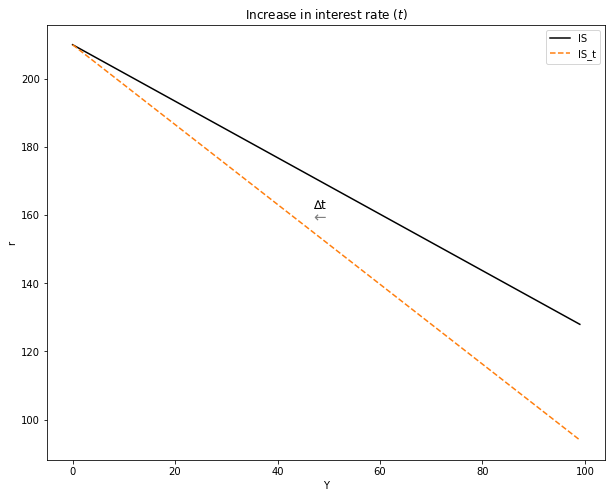

In [30]:
    # Graph

# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_t, label = "IS_t", color = "C1", linestyle = 'dashed') #Nueva IS

# Text added
plt.text(47, 162, '∆t', fontsize=12, color='black')
plt.text(47, 158, '←', fontsize=15, color='grey')

# Title and legend
ax.set(title = "Increase in interest rate $(t)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()